# Import Data

In [2]:
import pandas as pd
import numpy as np 

In [3]:
data = pd.read_csv('Data/bbca_data_5y.csv')

In [4]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [5]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [6]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,5633.568658,5660.523532,5615.598742,5651.538574,58420500,0.0,0.0,2019-10-31
1,5660.522959,5682.985352,5638.060566,5682.985352,42080500,0.0,0.0,2019-11-01
2,5705.447725,5732.402596,5624.583111,5638.060547,43794500,0.0,0.0,2019-11-04
3,5705.447660,5714.432617,5633.568005,5714.432617,66161500,0.0,0.0,2019-11-05
4,5732.401911,5732.401911,5656.029785,5656.029785,63393000,0.0,0.0,2019-11-06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [8]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [9]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [10]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [11]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [12]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [13]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [14]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [15]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,return,log_return,...,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,5633.567592,5660.522461,5606.612723,5660.522461,58833500,0.0,0.0,2019-11-27,0.002387,0.002384,...,5656.479346,5656.254785,5656.135917,5655.397281,5656.254785,22.882915,5702.020616,5610.488955,2,11
1,5656.029959,5656.029959,5611.105178,5615.597656,44248000,0.0,0.0,2019-11-28,-0.007937,-0.007968,...,5654.682373,5654.457739,5648.765324,5651.606841,5654.457739,24.618244,5703.694226,5605.221252,3,11
2,5597.627951,5656.030169,5593.135473,5642.552734,52954500,0.0,0.0,2019-11-29,0.004800,0.004789,...,5655.131592,5652.436108,5647.635762,5650.744545,5652.436108,23.798789,5700.033687,5604.838530,4,11
3,5642.552605,5772.834473,5633.567649,5772.834473,49909000,0.0,0.0,2019-12-02,0.023089,0.022827,...,5668.159766,5659.174805,5670.399164,5662.372157,5659.174805,35.646048,5730.466900,5587.882709,0,12
4,5768.341972,5768.341972,5700.954799,5727.909668,42823000,0.0,0.0,2019-12-03,-0.007782,-0.007813,...,5673.550635,5659.848657,5680.855619,5668.613825,5659.848657,36.852585,5733.553828,5586.143486,1,12


In [16]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
Dividends          0
Stock Splits       0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [17]:
dataUsed = data[['Close', 'Volume', 'ma_5', 'ma_10', 'ema_10', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'day_of_week', 'month']]

In [18]:
dataUsed.head()

,Close,Volume,ma_5,ma_10,ema_10,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,5660.522461,58833500,5654.232910,5656.479346,5656.135917,5656.254785,22.882915,5702.020616,5610.488955,2,11
1,5615.597656,44248000,5645.247949,5654.682373,5648.765324,5654.457739,24.618244,5703.694226,5605.221252,3,11
2,5642.552734,52954500,5640.755566,5655.131592,5647.635762,5652.436108,23.798789,5700.033687,5604.838530,4,11
3,5772.834473,49909000,5667.710352,5668.159766,5670.399164,5659.174805,35.646048,5730.466900,5587.882709,0,12
4,5727.909668,42823000,5683.883398,5673.550635,5680.855619,5659.848657,36.852585,5733.553828,5586.143486,1,12


In [19]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(dataUsed)

data_scaled


array([[0.23969743, 0.07777769, 0.21817154, ..., 0.27528493, 0.5       ,
        0.90909091],
       [0.23323999, 0.05849571, 0.21682084, ..., 0.27446791, 0.75      ,
        0.90909091],
       [0.23711448, 0.07000567, 0.2161455 , ..., 0.27440854, 1.        ,
        0.90909091],
       ...,
       [0.93531759, 0.06567692, 0.96767917, ..., 0.99948838, 0.25      ,
        0.81818182],
       [0.91375679, 0.15134759, 0.9586594 , ..., 0.99624454, 0.5       ,
        0.81818182],
       [0.89938292, 0.12896526, 0.94512975, ..., 0.99061983, 0.75      ,
        0.81818182]])

## Train Test Sequence

In [20]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 1:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [21]:
print(x.shape, y.shape)

(1134, 60, 10) (1134,)


## LSTM

LSTM (Long Short-Term Memory) adalah jenis jaringan saraf tiruan yang termasuk dalam kategori Recurrent Neural Networks (RNN). LSTM dirancang khusus untuk mengatasi masalah pada RNN biasa, yaitu sulitnya mengingat informasi dalam jangka panjang (long-term dependency).

In [22]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [24]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# train model 
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.1210 - val_loss: 0.0033
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0081 - val_loss: 0.0020
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0056 - val_loss: 0.0023
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0060 - val_loss: 0.0023
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0049 - val_loss: 0.0026
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0047 - val_loss: 0.0017
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0048 - val_loss: 0.0017
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0045 - val_loss: 0.0017
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step

In [26]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [27]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0]

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [28]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [29]:
real_prices

array([ 8.18413403,  8.53022297,  6.00378732,  6.18971395,  7.58032471,
        3.64623333,  6.25334344,  1.47158345, 10.02359301,  9.8326829 ,
        8.14568057,  3.29103979,  7.49263015,  8.56867798,  7.50492324,
        8.33795254,  7.20331813,  8.83785844,  7.61802622,  5.63490485,
        3.53025143,  4.12374561,  9.67813251,  3.03733012,  3.10257086,
        1.71804372,  3.73880946,  4.16060946,  3.94680005,  3.58824354,
        3.82020423,  5.56092933,  8.64558647,  7.00442442,  8.48036193,
        2.51776592,  9.87132166, 10.61651511,  6.07875182,  7.26730431,
        3.9394279 ,  5.48032589,  8.29949753,  4.25513498,  8.76094996,
       11.28849348,  3.67522861,  5.72758598,  9.86548045,  7.80653067,
        4.41865487,  6.59657431,  4.48043148,  4.41865487,  8.64558647,
        2.90685175, 10.57698697, 10.93274022,  4.45134819,  5.72758598,
        8.64558647,  9.58878347,  2.25445601,  5.56092933, 11.56519046,
        9.66783975,  3.57079325,  6.14067975,  5.56092933,  6.62

# Evaluation

In [30]:
# conpare real and predicted prices
import plotly.express as px

fig = px.line(x=data['date'][-len(real_prices):], y=real_prices, title='Real Prices vs Predicted Prices')
fig.add_scatter(x=data['date'][-len(predicted_prices):], y=predicted_prices, mode='lines')

fig.show()

In [31]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

np.float64(0.35124037193929064)

In [32]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

np.float64(0.2732080663572919)

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [33]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

np.float64(0.9601769911504425)

# Close Only

In [38]:
data_used = data.filter(['Close'])

dataset = data_used.values

training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

956

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.23969743],
       [0.23323999],
       [0.23711448],
       ...,
       [0.93531759],
       [0.91375679],
       [0.89938292]])

In [40]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.23969743, 0.23323999, 0.23711448, 0.25584101, 0.24938357,
       0.2480921 , 0.24486339, 0.25458028, 0.25458028, 0.25069351,
       0.25263686, 0.24745461, 0.25004563, 0.25004563, 0.26818373,
       0.30122088, 0.28113951, 0.28891291, 0.28891291, 0.29150399,
       0.29344727, 0.2921518 , 0.29279961, 0.30705093, 0.29862973,
       0.29927753, 0.29150399, 0.29927753, 0.29733404, 0.29992527,
       0.31611995, 0.31158537, 0.31352865, 0.31676775, 0.31158537,
       0.31093756, 0.31223311, 0.31223311, 0.30834655, 0.31223311,
       0.30575532, 0.30510744, 0.29927753, 0.2655925 , 0.26041026,
       0.28113951, 0.29798192, 0.29927753, 0.30186862, 0.30510744,
       0.30445964, 0.30705093, 0.30575532, 0.29150399, 0.29668617,
       0.29344727, 0.29344727, 0.2804917 , 0.28308293, 0.27142255])]
[np.float64(0.2720703547548784)]

[array([0.23969743, 0.23323999, 0.23711448, 0.25584101, 0.24938357,
       0.2480921 , 0.24486339, 0.25458028, 0.25458028, 0.25069351,
       0.25263686, 0.247

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=5, epochs=30)

Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0088
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 8.6227e-04
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0010
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 6.6533e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.7083e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 5.2784e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 6.4504e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.7424e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.0367e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.4964e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 4.6605e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 5.0031e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 3.6992e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 2.8640e-04
Epoch 

In [42]:
test_data = scaled_data[training_data_len - 60: , :]
print(len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


298
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_test = dataset[training_data_len:, :]
test = predictions[:-1, 0]

rmse_close_only = np.sqrt(np.mean(predictions - y_test)**2)
mae_close_only = mean_absolute_error(predictions, y_test)

print("rmse: ", rmse_close_only)
print("mae: ", mae_close_only)

rmse:  32.593405330882355
mae:  100.14029674369748


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\4018437278.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



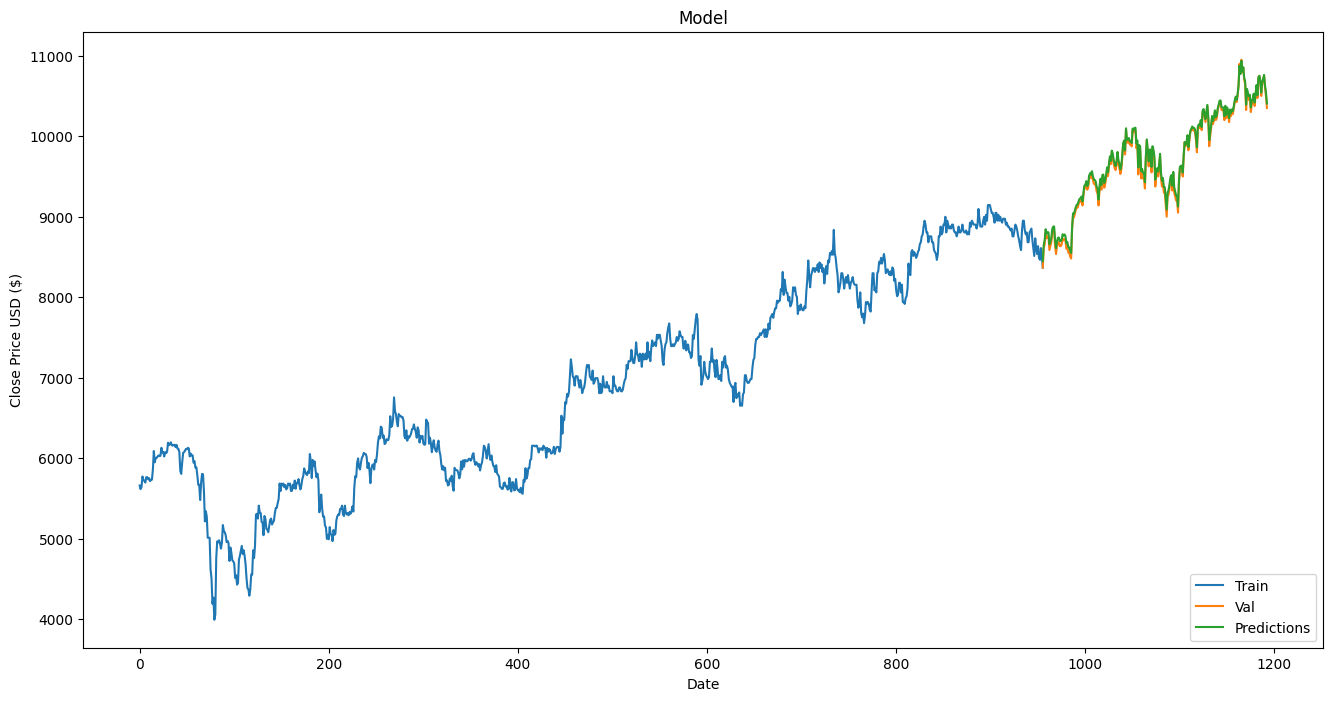

In [44]:
import matplotlib.pyplot as plt

train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [45]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with news sentiment siebert

In [46]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed

C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\412406848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-11-27,5660.522461
2019-11-28,5615.597656
2019-11-29,5642.552734
2019-12-02,5772.834473
2019-12-03,5727.909668
...,...
2024-10-25,10750.000000
2024-10-28,10600.000000
2024-10-29,10500.000000


In [60]:
news = pd.read_csv('Data/bbca sentiment analysis.csv')
# delete columns except date and sentiment and title
news = news[['publish_date', 'sentiment', 'title']]
news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

# hanya gunakan data diatas tanggal 2019-12-17

news = news[news.index >= '2019-12-17']

news

,sentiment,title
date,,
2024-11-28 08:51:00,NEGATIVE,IHSG Hari Ini Diprediksi Melemah di Level 7.20...
2024-11-19 08:49:00,POSITIVE,IHSG Hari Ini Diramal Bergerak di Level 7.100-...
2024-11-11 12:45:00,NEGATIVE,Berapa Harga Saham BBCA Hari Ini?
2024-10-29 08:30:00,POSITIVE,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...
2024-10-29 07:45:00,NEGATIVE,BCA Pemberi Utang Terbesar ke Sritex Respons s...
...,...,...
2020-02-19 08:51:00,POSITIVE,IHSG Berpotensi Menguat Pagi Ini
2020-01-30 13:49:00,NEGATIVE,BCA dan Bank Mandiri Angkat Suara soal M-Banki...
2020-01-17 08:55:00,POSITIVE,IHSG Berpeluang Menguat ke 6.325


In [61]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [62]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,sentiment,title
date,,,
2019-11-27,5660.522461,NaN,NaN
2019-11-28,5615.597656,NaN,NaN
2019-11-29,5642.552734,NaN,NaN
2019-12-02,5772.834473,NaN,NaN
2019-12-03,5727.909668,NaN,NaN
...,...,...,...
2024-10-25,10750.000000,NaN,NaN
2024-10-28,10600.000000,NaN,NaN
2024-10-29,10500.000000,POSITIVE,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...


In [63]:
dfMerge['sentiment'].value_counts()

sentiment
POSITIVE    116
NEGATIVE     56
Name: count, dtype: int64

In [64]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                   Close sentiment  \
2019-11-27   5660.522461       NaN   
2019-11-28   5615.597656       NaN   
2019-11-29   5642.552734       NaN   
2019-12-02   5772.834473       NaN   
2019-12-03   5727.909668       NaN   
...                  ...       ...   
2024-10-25  10750.000000  NEGATIVE   
2024-10-28  10600.000000       NaN   
2024-10-29  10500.000000       NaN   
2024-10-30  10350.000000  POSITIVE   
2024-10-31  10250.000000       NaN   

                                                        title  
2019-11-27                                                NaN  
2019-11-28                                                NaN  
2019-11-29                                                NaN  
2019-12-02                                                NaN  
2019-12-03                                                NaN  
...                                                       ...  
2024-10-25  Bos Buruh Ungkap Sritex Pailit Gara-gara Sulit...  
2024-10-28                     

sentiment
POSITIVE    121
NEGATIVE     61
Name: count, dtype: int64

In [65]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
0.0    1196
Name: count, dtype: int64

In [66]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.23969743, 0.        ],
       [0.23323999, 0.        ],
       [0.23711448, 0.        ],
       ...,
       [0.93531759, 0.        ],
       [0.91375679, 0.        ],
       [0.89938292, 0.        ]])

In [67]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [69]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


Epoch 1/30


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0116
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 8.8047e-04
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 7.8963e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.9804e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.6509e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.1541e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 5.9334e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 5.8736e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.9944e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.9681e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.1020e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 4.8189e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.3821e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 3.5482e-04
Ep

In [70]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [71]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse_siebert = np.sqrt(mean_squared_error(y_test, predictions))
mae_siebert = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse_siebert)
print("MAE: ", mae_siebert)



RMSE:  288.552254034092
MAE:  260.4232126444328


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\1510546548.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



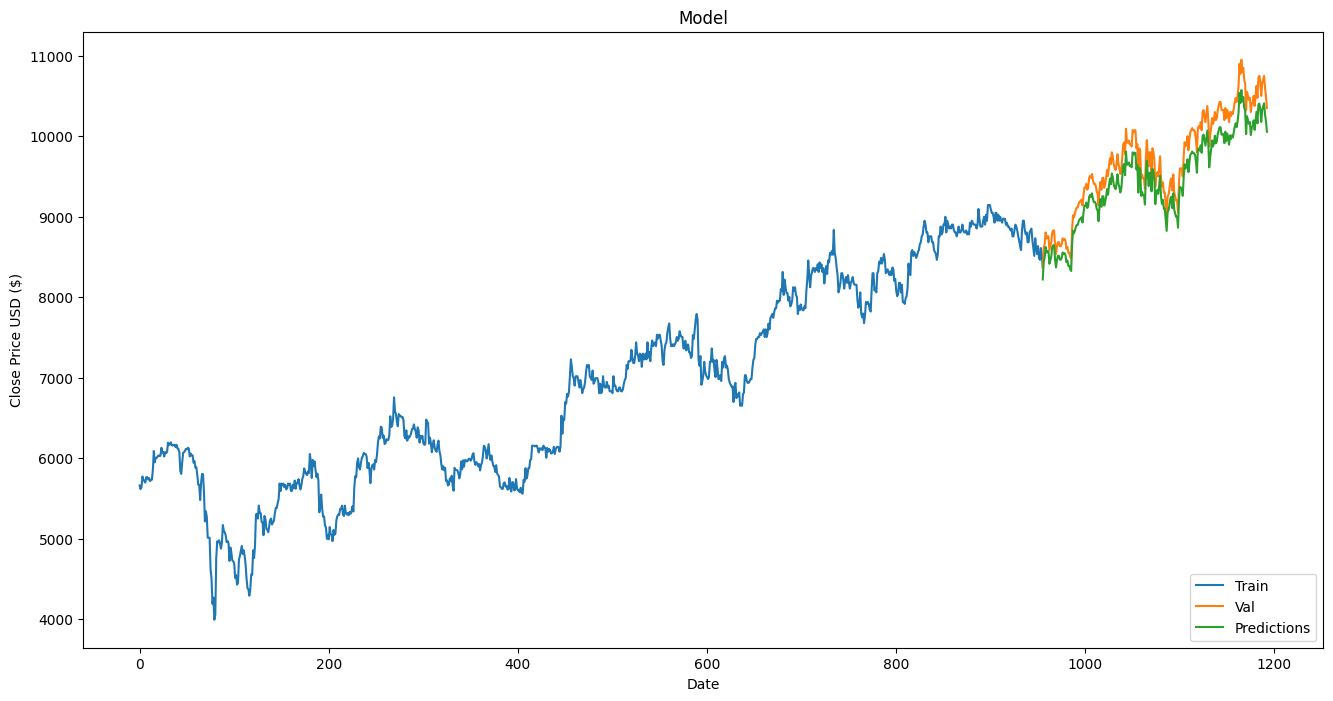

In [72]:
train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [73]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with manual news title sentiment


In [81]:
import pandas as pd


news = pd.read_csv('Data/BBCA DAVIN - BBCA Davin - judul.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\996891354.py:14: FutureWarning:

Parsed string "Thursday, 28 Nov 2024 08:51 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-28 08:51:00,IHSG Hari Ini Diprediksi Melemah di Level 7.20...,negatif
2024-11-19 08:49:00,IHSG Hari Ini Diramal Bergerak di Level 7.100-...,positif
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,positif
2024-10-29 08:30:00,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,positif
2024-10-29 07:45:00,BCA Pemberi Utang Terbesar ke Sritex Respons s...,positif
...,...,...
2020-02-19 08:51:00,IHSG Berpotensi Menguat Pagi Ini,positif
2020-01-30 13:49:00,BCA dan Bank Mandiri Angkat Suara soal M-Banki...,negatif
2020-01-17 08:55:00,IHSG Berpeluang Menguat ke 6.325,positif


In [82]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [83]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-11-27,5660.522461,NaN,NaN
2019-11-28,5615.597656,NaN,NaN
2019-11-29,5642.552734,NaN,NaN
2019-12-02,5772.834473,NaN,NaN
2019-12-03,5727.909668,NaN,NaN
...,...,...,...
2024-10-25,10750.000000,NaN,NaN
2024-10-28,10600.000000,NaN,NaN
2024-10-29,10500.000000,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,positif


In [84]:
dfMerge['sentiment'].value_counts()

sentiment
positif    112
negatif     60
Name: count, dtype: int64

In [85]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                   Close                                              title  \
2019-11-27   5660.522461                                                NaN   
2019-11-28   5615.597656                                                NaN   
2019-11-29   5642.552734                                                NaN   
2019-12-02   5772.834473                                                NaN   
2019-12-03   5727.909668                                                NaN   
...                  ...                                                ...   
2024-10-25  10750.000000  Bos Buruh Ungkap Sritex Pailit Gara-gara Sulit...   
2024-10-28  10600.000000                                                NaN   
2024-10-29  10500.000000                                                NaN   
2024-10-30  10350.000000  Masuk Daftar 45 Saham Pre-opening Saham GOTO M...   
2024-10-31  10250.000000                                                NaN   

           sentiment  
2019-11-27       NaN  
2019-

sentiment
positif    117
negatif     65
Name: count, dtype: int64

In [86]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1014
 1.0     117
-1.0      65
Name: count, dtype: int64

In [87]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.23969743, 0.5       ],
       [0.23323999, 0.5       ],
       [0.23711448, 0.5       ],
       ...,
       [0.93531759, 0.5       ],
       [0.91375679, 1.        ],
       [0.89938292, 0.5       ]])

In [88]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [89]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 0.0191
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 9.9718e-04
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0013
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.3514e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 7.7628e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 9.8657e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 6.3161e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 8.8464e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.5784e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.2114e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 6.5232e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 5.1714e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 4.8617e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3.9963

In [96]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [97]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse_title = np.sqrt(mean_squared_error(y_test, predictions))
mae_title = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse_title)
print("MAE: ", mae_title)



RMSE:  272.6773679906122
MAE:  244.55183987657563


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\1510546548.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



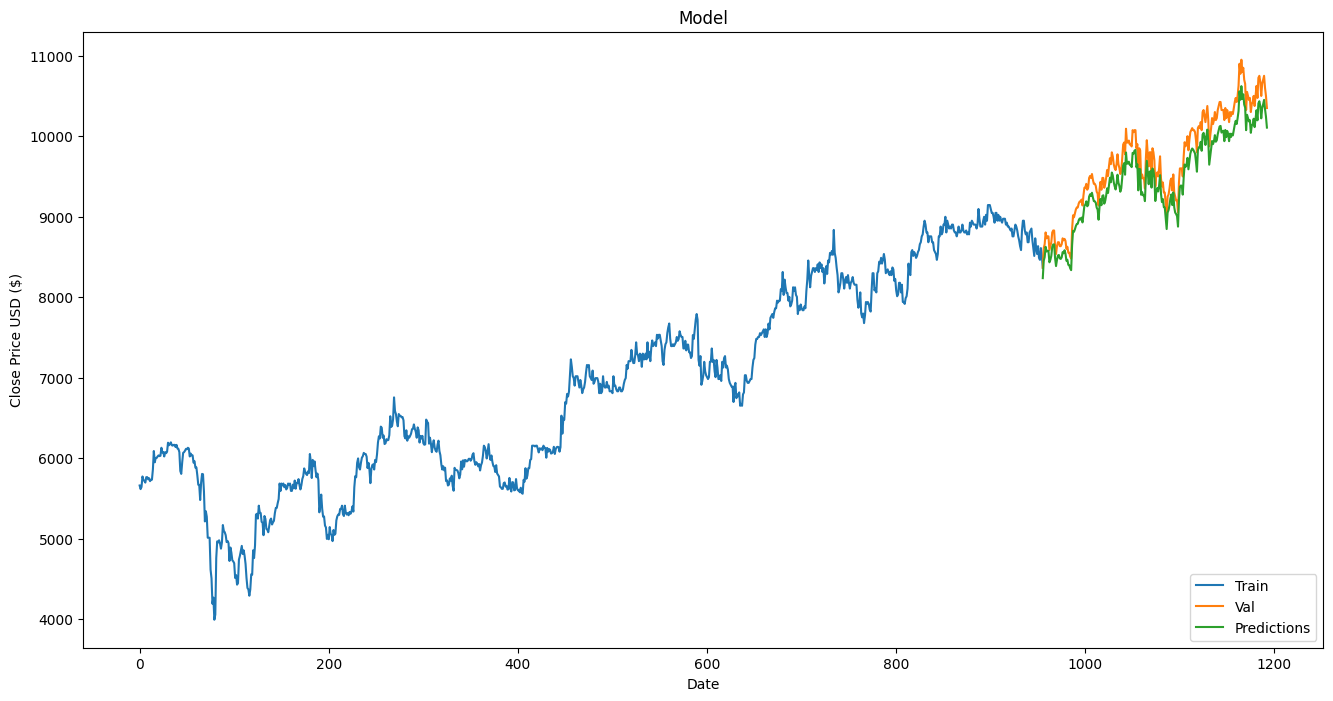

In [98]:
train = data[:training_data_len]
# ambil data dari training_data_len sampai akhir -1
valid = data[training_data_len-1:-1]  # Ambil 1 baris sebelum training_data_len dan hilangkan baris terakhir
valid['Predictions'] = predictions[:, 0]  # Predictions harus sesuai panjang dengan valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [99]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with manual news body sentiment

In [100]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed

C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\412406848.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-11-27,5660.522461
2019-11-28,5615.597656
2019-11-29,5642.552734
2019-12-02,5772.834473
2019-12-03,5727.909668
...,...
2024-10-25,10750.000000
2024-10-28,10600.000000
2024-10-29,10500.000000


In [102]:
import pandas as pd


news = pd.read_csv('Data/BBCA DAVIN -  BBCA Davin - body.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\4162372544.py:14: FutureWarning:

Parsed string "Thursday, 28 Nov 2024 08:51 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-28 08:51:00,IHSG Hari Ini Diprediksi Melemah di Level 7.20...,negatif
2024-11-19 08:49:00,IHSG Hari Ini Diramal Bergerak di Level 7.100-...,negatif
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,negatif
2024-10-29 08:30:00,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,positif
2024-10-29 07:45:00,BCA Pemberi Utang Terbesar ke Sritex Respons s...,positif
...,...,...
2020-02-19 08:51:00,IHSG Berpotensi Menguat Pagi Ini,positif
2020-01-30 13:49:00,BCA dan Bank Mandiri Angkat Suara soal M-Banki...,positif
2020-01-17 08:55:00,IHSG Berpeluang Menguat ke 6.325,positif


In [103]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()


In [104]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-11-27,5660.522461,NaN,NaN
2019-11-28,5615.597656,NaN,NaN
2019-11-29,5642.552734,NaN,NaN
2019-12-02,5772.834473,NaN,NaN
2019-12-03,5727.909668,NaN,NaN
...,...,...,...
2024-10-25,10750.000000,NaN,NaN
2024-10-28,10600.000000,NaN,NaN
2024-10-29,10500.000000,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,positif


In [105]:
# cari data title yang ada di news dan tidak ada di dfMerge

news[~news.index.isin(dfMerge.index)]

# cari tanggal terdekat yang ada di dfMerge berdasar data yang ada di news dan tidak ada di dfMerge

,title,sentiment
date,,
2019-12-24,Menebak Jumlah Harta Duo Hartono Jika Harga Sa...,positif
2020-10-04,Simak Rekomendasi Saham buat Bekal Trading Besok,positif
2020-12-19,Daripada Rp 75 Juta buat Open BO Mending Beli ...,positif
2021-04-10,Jahja Setiaatmadja Borong Saham BCA Rp 77 M,positif
2021-07-31,BCA Mau Stock Split Saham 1:5 Harganya Jadi Le...,positif
2021-08-11,bank bjb Raih Peringkat Pertama Bank Go Public...,negatif
2021-10-17,Kata Analis soal BNI yang Mau Akuisisi dan Bik...,positif
2022-09-18,Bos BCA Jual 1 Juta Lembar Saham Sebagian buat...,negatif
2022-10-16,Investor Asing Diam-diam Borong Saham GOTO,positif


In [106]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                   Close                                              title  \
2019-11-27   5660.522461                                                NaN   
2019-11-28   5615.597656                                                NaN   
2019-11-29   5642.552734                                                NaN   
2019-12-02   5772.834473                                                NaN   
2019-12-03   5727.909668                                                NaN   
...                  ...                                                ...   
2024-10-25  10750.000000  Bos Buruh Ungkap Sritex Pailit Gara-gara Sulit...   
2024-10-28  10600.000000                                                NaN   
2024-10-29  10500.000000                                                NaN   
2024-10-30  10350.000000  Masuk Daftar 45 Saham Pre-opening Saham GOTO M...   
2024-10-31  10250.000000                                                NaN   

           sentiment  
2019-11-27       NaN  
2019-

sentiment
positif    123
negatif     59
Name: count, dtype: int64

In [107]:
# Pastikan kolom 'title' di dfMerge tidak memiliki NaN untuk perbandingan
dfMerge_titles = dfMerge['title'].dropna()

# Filter berita di news yang tidak ada di dfMerge berdasarkan 'title'
missing_news = news[~news['title'].isin(dfMerge_titles)]

# Tampilkan hasil
print(missing_news)

dfMerge['sentiment'].value_counts()


                                                        title sentiment  \
date                                                                      
2024-11-11                  Berapa Harga Saham BBCA Hari Ini?   negatif   
2024-11-19  IHSG Hari Ini Diramal Bergerak di Level 7.100-...   negatif   
2024-11-28  IHSG Hari Ini Diprediksi Melemah di Level 7.20...   negatif   

           nearest_date  
date                     
2024-11-11          NaT  
2024-11-19          NaT  
2024-11-28          NaT  


sentiment
positif    123
negatif     59
Name: count, dtype: int64

In [108]:
print(dfMerge['sentiment'].unique())

dfMerge['sentiment'] = dfMerge['sentiment'].map({'POSITIVE': 1, 'NEGATIVE': -1}).fillna(0)

print(dfMerge['sentiment'].unique())

dfMerge['sentiment'].value_counts()

[nan 'positif' 'negatif']
[0.]


sentiment
0.0    1196
Name: count, dtype: int64

In [109]:
# Contoh data sentimen
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data


array([[0.23969743, 0.        ],
       [0.23323999, 0.        ],
       [0.23711448, 0.        ],
       ...,
       [0.93531759, 0.        ],
       [0.91375679, 0.        ],
       [0.89938292, 0.        ]])

In [110]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [111]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0174
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0011
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 9.3746e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9.4111e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.3228e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.6541e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 5.7505e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.3895e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.0602e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.4465e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 4.1179e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.9727e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.5468e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.6370

In [112]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [113]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse_body = np.sqrt(mean_squared_error(y_test, predictions))
mae_body = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse_body)
print("MAE: ", mae_body)



RMSE:  127.47097670739815
MAE:  96.99560957195378


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



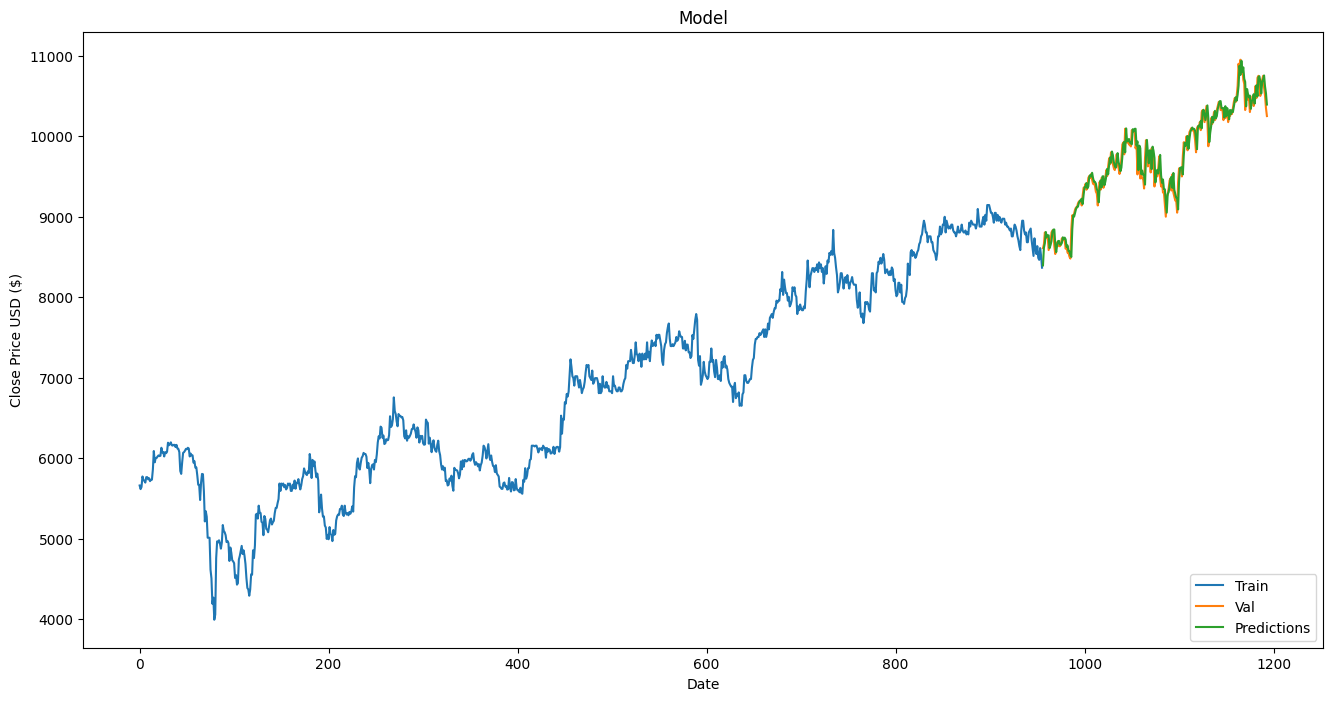

In [114]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [115]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Close with manual news 3 days graph sentiment

In [116]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}


In [117]:
import pandas as pd


news = pd.read_csv('Data/BBCA DAVIN - BBCA Davin - stock.csv')
news = news[['publish_date', 'title', 'sentiment']]

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    news['publish_date'] = news['publish_date'].str.replace(indo_month, eng_month, regex=False)

news = news.rename(columns={'publish_date': 'date'})
news['date'] = pd.to_datetime(news['date'])
news = news.set_index('date')

news = news[news.index >= '2019-12-17']

news

C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\2835977998.py:14: FutureWarning:

Parsed string "Thursday, 28 Nov 2024 08:51 WIB" included an un-recognized timezone "WIB". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.



,title,sentiment
date,,
2024-11-28 08:51:00,IHSG Hari Ini Diprediksi Melemah di Level 7.20...,negatif
2024-11-19 08:49:00,IHSG Hari Ini Diramal Bergerak di Level 7.100-...,negatif
2024-11-11 12:45:00,Berapa Harga Saham BBCA Hari Ini?,positif
2024-10-29 08:30:00,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,negatif
2024-10-29 07:45:00,BCA Pemberi Utang Terbesar ke Sritex Respons s...,negatif
...,...,...
2020-02-19 08:51:00,IHSG Berpotensi Menguat Pagi Ini,negatif
2020-01-30 13:49:00,BCA dan Bank Mandiri Angkat Suara soal M-Banki...,negatif
2020-01-17 08:55:00,IHSG Berpeluang Menguat ke 6.325,negatif


In [118]:
dataUsed = data[['Close', 'date']]
dataUsed['date'] = pd.to_datetime(dataUsed['date'])

dataUsed = dataUsed.set_index('date')

dataUsed


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\2178100794.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close
date,
2019-11-27,5660.522461
2019-11-28,5615.597656
2019-11-29,5642.552734
2019-12-02,5772.834473
2019-12-03,5727.909668
...,...
2024-10-25,10750.000000
2024-10-28,10600.000000
2024-10-29,10500.000000


In [119]:
news.index = news.index.normalize()
news = news.groupby(news.index).first()

In [120]:
# Pastikan data terurut berdasarkan index
news.index = news.index.normalize()

# Merge DataFrame berdasarkan index
dfMerge = dataUsed.merge(news, how='left', left_index=True, right_index=True)

dfMerge

,Close,title,sentiment
date,,,
2019-11-27,5660.522461,NaN,NaN
2019-11-28,5615.597656,NaN,NaN
2019-11-29,5642.552734,NaN,NaN
2019-12-02,5772.834473,NaN,NaN
2019-12-03,5727.909668,NaN,NaN
...,...,...,...
2024-10-25,10750.000000,NaN,NaN
2024-10-28,10600.000000,NaN,NaN
2024-10-29,10500.000000,Masuk Daftar 45 Saham Pre-opening Saham GOTO M...,negatif


In [121]:
dfMerge['sentiment'].value_counts()

sentiment
positif    88
negatif    84
Name: count, dtype: int64

In [122]:
# Pastikan data terurut berdasarkan index
dataUsed = dataUsed.sort_index()
news = news.sort_index()

# Buat kolom tambahan untuk mencatat tanggal pertama di dataUsed setelah berita
news['nearest_date'] = dataUsed.index.searchsorted(news.index, side='right')
news['nearest_date'] = news['nearest_date'].map(lambda x: dataUsed.index[x] if x < len(dataUsed.index) else None)

# Gabungkan dataUsed dengan berita berdasarkan nearest_date
news_mapped = news.dropna(subset=['nearest_date']).set_index('nearest_date')
dfMerge = dataUsed.merge(news_mapped, how='left', left_index=True, right_index=True)

# Tampilkan hasil
print(dfMerge)
dfMerge['sentiment'].value_counts()


                   Close                                              title  \
2019-11-27   5660.522461                                                NaN   
2019-11-28   5615.597656                                                NaN   
2019-11-29   5642.552734                                                NaN   
2019-12-02   5772.834473                                                NaN   
2019-12-03   5727.909668                                                NaN   
...                  ...                                                ...   
2024-10-25  10750.000000  Bos Buruh Ungkap Sritex Pailit Gara-gara Sulit...   
2024-10-28  10600.000000                                                NaN   
2024-10-29  10500.000000                                                NaN   
2024-10-30  10350.000000  Masuk Daftar 45 Saham Pre-opening Saham GOTO M...   
2024-10-31  10250.000000                                                NaN   

           sentiment  
2019-11-27       NaN  
2019-

sentiment
positif    92
negatif    90
Name: count, dtype: int64

In [123]:
dfMerge['sentiment'] = dfMerge['sentiment'].map({'positif': 1, 'negatif': -1}).fillna(0)

dfMerge['sentiment'].value_counts()

sentiment
 0.0    1014
 1.0      92
-1.0      90
Name: count, dtype: int64

In [124]:
sentiment_data = dfMerge.filter(['sentiment']).values  # Pastikan ada kolom 'Sentiment'

# Normalisasi data sentimen
scaled_sentiment = scaler.fit_transform(sentiment_data)

scaled_data = dfMerge.filter(['Close']).values

# Normalisasi data harga
scaled_data = scaler.fit_transform(scaled_data)

# Gabungkan harga (Close) dan sentimen
scaled_combined_data = np.hstack((scaled_data, scaled_sentiment))

scaled_combined_data

array([[0.23969743, 0.5       ],
       [0.23323999, 0.5       ],
       [0.23711448, 0.5       ],
       ...,
       [0.93531759, 0.5       ],
       [0.91375679, 0.        ],
       [0.89938292, 0.5       ]])

In [125]:
train_data = scaled_combined_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :])  # Tambahkan semua fitur
    y_train.append(train_data[i, 0])  # Target tetap 'Close'

x_train, y_train = np.array(x_train), np.array(y_train)

print(f"x_train shape: {x_train.shape}")  # Periksa shape-nya
# Reshape input ke bentuk yang dimengerti oleh LSTM
# Sekarang menjadi (samples, timesteps, features)


x_train shape: (896, 60, 2)


In [126]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))  # Sesuaikan fitur
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=5, epochs=30)


C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0147
Epoch 2/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0011
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 8.5399e-04
Epoch 4/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 6.9203e-04
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 7.1389e-04
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 7.2125e-04
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 6.1893e-04
Epoch 8/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.2791e-04
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.9890e-04
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 5.7854e-04
Epoch 11/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.9955e-04
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.9950e-04
Epoch 13/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.0105e-04
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 4.7201

In [127]:
test_data = scaled_combined_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, :])  # Tambahkan semua fitur

x_test = np.array(x_test)

# Reshape data uji
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [128]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# jumlah data prediction - jumlah data y_test
start = len(predictions) - len(y_test)

predictions = predictions[start:]

# Hitung metrik evaluasi
rmse_3days = np.sqrt(mean_squared_error(y_test, predictions))
mae_3days = mean_absolute_error(y_test, predictions)

print("RMSE: ", rmse_3days)
print("MAE: ", mae_3days)



RMSE:  138.39406292434475
MAE:  106.02582146139706


C:\Users\Acer\AppData\Local\Temp\ipykernel_1920\3756074682.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



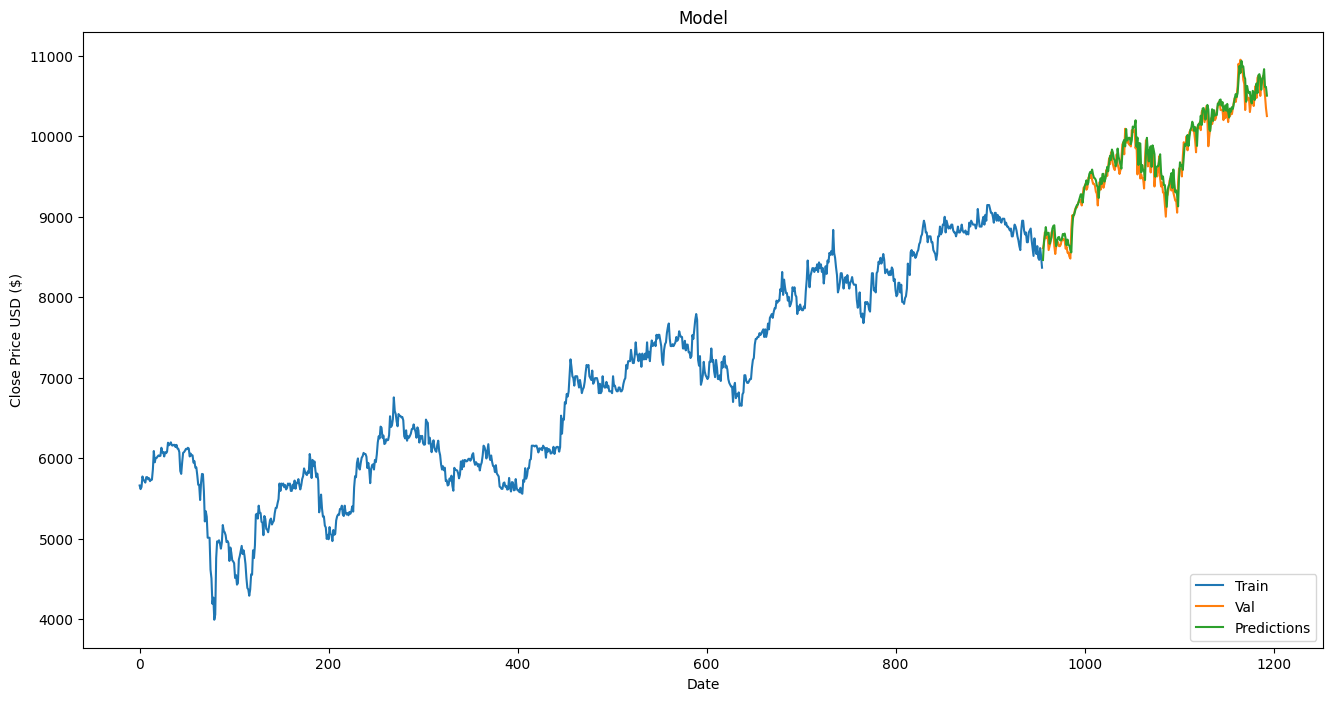

In [129]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [130]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=valid['date'], y=valid['Close'], mode='lines', name='Val'))
fig.add_trace(go.Scatter(x=valid['date'], y=valid['Predictions'], mode='lines', name='Predictions'))

fig.update_layout(title='Model',
                        xaxis_title='Date',
                        yaxis_title='Close Price USD ($)')
fig.show()

# Perbandingan RMSE dan MAE

In [133]:
print("Close Only")
print("RMSE: ", rmse_close_only)
print("MAE: ", mae_close_only)
print("\n")

print("Close with news sentiment siebert")
print("RMSE: ", rmse_siebert)
print("MAE: ", mae_siebert)
print("\n")

print("Close with manual news title sentiment")
print("RMSE: ", rmse_title)
print("MAE: ", mae_title)
print("\n")

print("Close with manual news body sentiment")
print("RMSE: ", rmse_body)
print("MAE: ", mae_body)
print("\n")

print("Close with manual 3 days stock sentiment")
print("RMSE: ", rmse_3days)
print("MAE: ", mae_3days)

Close Only
RMSE:  32.593405330882355
MAE:  100.14029674369748


Close with news sentiment siebert
RMSE:  288.552254034092
MAE:  260.4232126444328


Close with manual news title sentiment
RMSE:  272.6773679906122
MAE:  244.55183987657563


Close with manual news body sentiment
RMSE:  127.47097670739815
MAE:  96.99560957195378


Close with manual 3 days stock sentiment
RMSE:  138.39406292434475
MAE:  106.02582146139706
